<a href="https://colab.research.google.com/github/bandzi11/python-data-analysis/blob/main/notatnik_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean: 175.066
Median: 174.911
Standard Deviation: 12.081


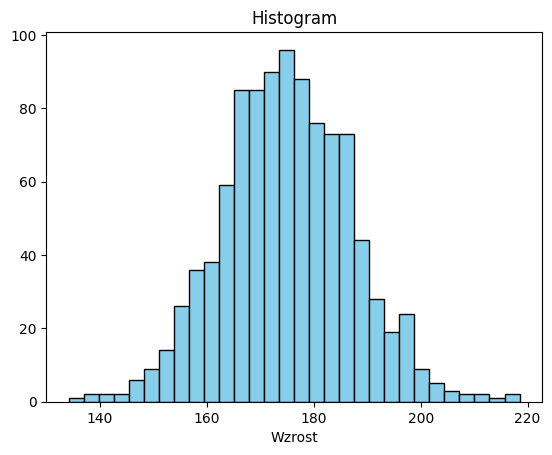

25. percentyl: 166.86 cm
50. percentyl (mediana): 174.91 cm
75. percentyl: 183.13 cm
Liczba wartości odstających: 12
Zakres wartości odstających: < 142.47 cm lub > 207.52 cm
t-student: 13.25
p-wartość: 4.671316882446664e-37
H0: Średni wzrost w populacji wynosi 170 cm
Różnica jest statystycznie istotna (odrzucamy H0).
Prawdopodobieństwo wzrostu > 190 cm: 10.00%


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, precision_score, \
    recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

#generowanie 1000 danych na temat wzrostu
#obliczanie średniej, mediany i odchylenia standardowego
height = np.random.normal(loc=175, scale=12, size=1000)
mean_height = np.mean(height)
median_height = np.median(height)
std_deviation_height = np.std(height)

print(f"Mean: {mean_height:.3f}")
print(f"Median: {median_height:.3f}")
print(f"Standard Deviation: {std_deviation_height:.3f}")

# https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/
# tworzenie histogramu dla wygenerowanych danych
plt.hist(height, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Wzrost')
plt.title('Histogram')
plt.show()

#print("Wylosowane wartości wzrostu:")
#for i, h in enumerate(height, 1):
#    print(f"{h:.2f}", end=", ")
#    if i % 10 == 0:
#        print()

# https://www.geeksforgeeks.org/numpy-percentile-in-python/
# obliczanie centyli dla wzrostu z bazy danych
p25 = np.percentile(height, 25)
p50 = np.percentile(height, 50)
p75 = np.percentile(height, 75)
print(f"25. percentyl: {p25:.2f} cm")
print(f"50. percentyl (mediana): {p50:.2f} cm")
print(f"75. percentyl: {p75:.2f} cm")

#obliczanie wartości odstających
# IQR - rozstęp międzykwartylowy - 50% środkowych danych
IQR = p75 - p25
lower_bound = p25 - 1.5 * IQR
upper_bound = p75 + 1.5 * IQR
outliers = height[(height < lower_bound) | (height > upper_bound)]

print(f"Liczba wartości odstających: {len(outliers)}")
print(f"Zakres wartości odstających: < {lower_bound:.2f} cm lub > {upper_bound:.2f} cm")

#test t-studenta, hipoteza H0
t_student, p_val = stats.ttest_1samp(height, popmean=170)
print(f"t-student: {t_student:.2f}")
print(f"p-wartość: {p_val}")

print(f"H0: Średni wzrost w populacji wynosi 170 cm")
if p_val < 0.05:
    print("Różnica jest statystycznie istotna (odrzucamy H0).")
else:
    print("Brak podstaw do odrzucenia H0.")

#Prawdopodobieństwo, że wzrost > 190 cm
more_than_190 = np.mean(height > 190)
print(f"Prawdopodobieństwo wzrostu > 190 cm: {more_than_190:.2%}")



In [10]:
#wczytanie danych z pliku .csv
file = pd.read_csv("heart_disease_datasetx.csv", sep =';')
#wczytanie kolumn dla upewnienia się czy w kodzie używamy dobrych nazw
print(file.columns.tolist())

#obliczanie zależności występowania choroby od płci
disease_by_sex = file[file['Disease'] == 1]['Sex'].value_counts()
total_by_sex = file['Sex'].value_counts()

percent_men = disease_by_sex.get('male', 1) / total_by_sex.get('male', 1) * 100
percent_women = disease_by_sex.get('female', 1) / total_by_sex.get('female', 1) * 100
diff_percent = percent_men - percent_women

print("1. Choroby serca – płeć:")
print(f"Mężczyźni: {percent_men:.2f}%, Kobiety: {percent_women:.2f}%")
print(f"Różnica: {abs(diff_percent):.2f}% więcej u {'mężczyzn' if diff_percent > 0 else 'kobiet'}\n")



['Unnamed: 0', 'Age', 'Sex', 'Chest pain type', 'Resting blood pressure', 'Serum cholesterol in mg/dl', 'Fasting blood sugar > 120 mg/dl', 'Resting electrocardiographic results', 'Maximum heart rate achieved', 'Exercise induced angina', 'ST depression induced by exercise relative to rest', 'Slope of the peak exercise ST segment', 'Number of major vessels', 'Thal defect', 'Disease']
1. Choroby serca – płeć:
Mężczyźni: 42.08%, Kobiety: 72.44%
Różnica: 30.36% więcej u kobiet



Na choroby serca częściej cierpią kobiety, różnica wynosi 30,36%

2. Średni cholesterol w zależności od płci i występowania chorób serca:
Sex  Disease
0    False      276.732558
     True       255.641593
1    False      245.995157
     True       229.933333
Name: Serum cholesterol in mg/dl, dtype: float64 



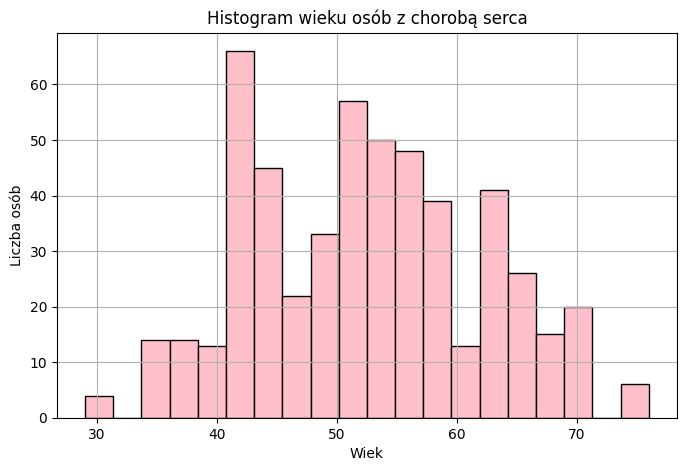

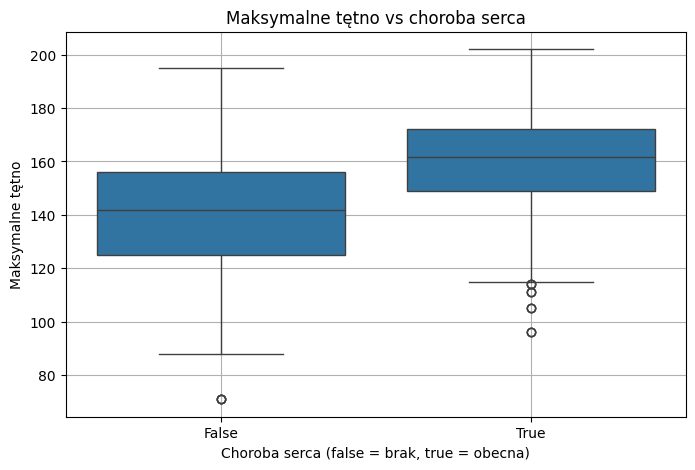

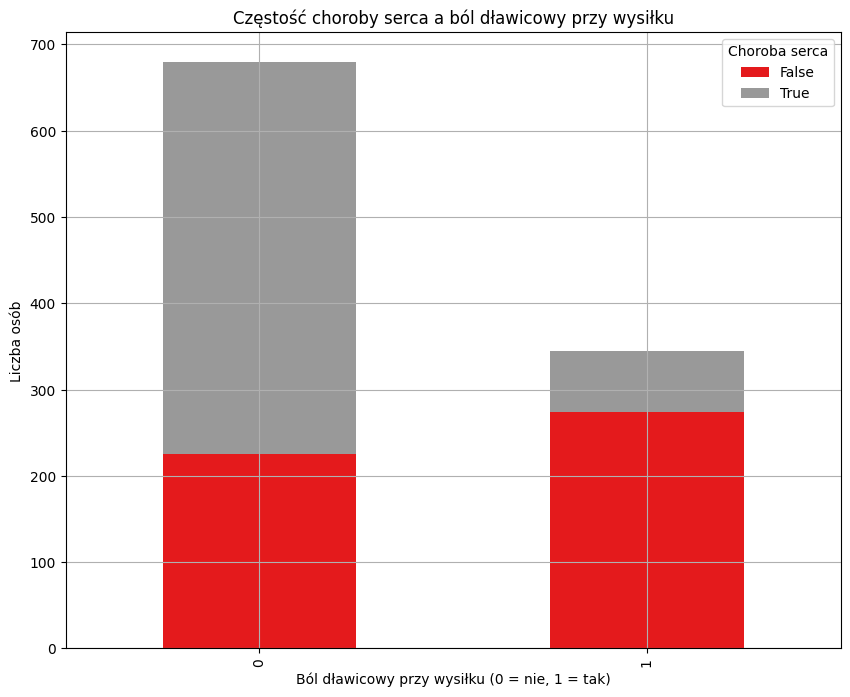

In [13]:
print("2. Średni cholesterol w zależności od płci i występowania chorób serca:")
cholesterol_means = file.groupby(['Sex', 'Disease'])['Serum cholesterol in mg/dl'].mean()
print(cholesterol_means, "\n")

plt.figure(figsize=(8,5))
file[file['Disease'] == 1]['Age'].hist(bins=20, edgecolor='black', color='pink')
plt.title("Histogram wieku osób z chorobą serca")
plt.xlabel("Wiek")
plt.ylabel("Liczba osób")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=file, x='Disease', y='Maximum heart rate achieved')
plt.title("Maksymalne tętno vs choroba serca")
plt.xlabel("Choroba serca (false = brak, true = obecna)")
plt.ylabel("Maksymalne tętno")
plt.grid(True)
plt.show()
#crosstabs https://www.geeksforgeeks.org/pandas-crosstab-function-in-python/
pain_vs_disease = pd.crosstab(file['Exercise induced angina'], file['Disease'])
pain_vs_disease.plot(kind='bar', stacked=True, colormap='Set1', figsize=(10, 8))
plt.title("Częstość choroby serca a ból dławicowy przy wysiłku")
plt.xlabel("Ból dławicowy przy wysiłku (0 = nie, 1 = tak)")
plt.ylabel("Liczba osób")
plt.legend(title="Choroba serca")
plt.grid(True)
plt.show()

Na choroby serca najczęściej cierpią osoby w wieku około 42 lat.

Mediana tętna w próbie wysiłkowej dla osób z chorobami serca jest znacząco wyższe niż dla osób zdrowych. Osoby zdrowe osiągają szersze spektrum tętna podczas testu niż osoby chore. U osób chorych pojawia się więcej osób osiągających znacznie niższe tętno niż mediana próby.

Choroby serca występują częściej u osób u których nie stwierdzono występowania bólu dławicowego. Osób bez objaw bólu dławicowego jest około dwukrotnie więcej niż osób u których ból występuje. Ból dławicowy nie musi korelować z występowaniem chorób serca.

Accuracy: 76.62%
Współczynniki regresji:
Age                               -0.019655
Sex                               -1.948194
Chest pain type                    0.736074
Resting blood pressure            -0.022065
Serum cholesterol in mg/dl        -0.008884
Fasting blood sugar > 120 mg/dl   -0.166558
Maximum heart rate achieved        0.038908
Exercise induced angina           -0.899571
dtype: float64

Klasyfikacja:
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       159
           1       0.73      0.83      0.78       149

    accuracy                           0.77       308
   macro avg       0.77      0.77      0.77       308
weighted avg       0.77      0.77      0.77       308

Precision(test): 0.771
Recall(test): 0.768
F1 Score(test): 0.766


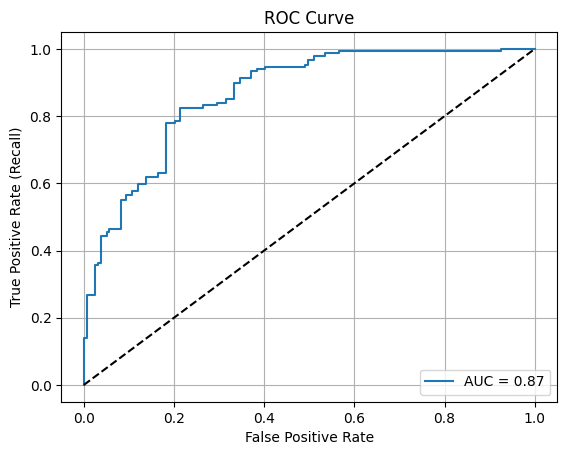

In [12]:


# do wykonania regresji logistycznej korzystano ze źródeł:
# https://www.geeksforgeeks.org/ml-logistic-regression-using-python/
# https://www.datacamp.com/tutorial/understanding-logistic-regression-python
# https://alfa.im.pwr.edu.pl/~sobczyk/dydaktyka/regresja_logistyczna_dane.pdf


file['Sex'] = LabelEncoder().fit_transform(file['Sex'])  # male=1, female=0, kodowanie tekstu do wykonania regresji
file['Fasting blood sugar > 120 mg/dl'] = file['Fasting blood sugar > 120 mg/dl'].astype(int) # true = 1, false = 0
file['Exercise induced angina'] = file['Exercise induced angina'].astype(int)

data = [
    'Age',
    'Sex',
    'Chest pain type',
    'Resting blood pressure',
    'Serum cholesterol in mg/dl',
    'Fasting blood sugar > 120 mg/dl',
    'Maximum heart rate achieved',
    'Exercise induced angina'
]
X = file[data] #dane wejściowe
y = file['Disease'].astype(int) # przewidywanie występowania disease 1 = true, 0 = false

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model regresji logistycznej
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predykcje, klasyfikacja danych testowych
y_pred = model.predict(X_test) # tablica z przewidzianymi wartościami [0, 0, 1, 0, 1 itp.]
y_prob = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


# Współczynniki regresji
print("Współczynniki regresji:")
coefficients = pd.Series(model.coef_[0], index=data)
print(coefficients)

# Macierz pomyłek i klasyfikacja
print("\nKlasyfikacja:")
print(classification_report(y_test, y_pred))

# https://www.geeksforgeeks.org/evaluation-metrics-for-classification-model-in-python/
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Precision(test): {precision:.3f}')
print(f'Recall(test): {recall:.3f}')
print(f'F1 Score(test): {f1:.3f}')
# Krzywa ROC i AUC
# Receiver Operator Characteristic
# AUC oddalenie od prostej y = x (równoważnie pole pod wykresem)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# jupiter notebook - wrzucić przez collab

Dokładność modelu uzyskana na zbiorze danych wynosi 76,62% czyli w takiej ilości przypadków model dobrze kwalifikuje dane. Jest to wynik dobry.
Czułość wykrywania choroby wynosi 83%

AUC (Area under curve) - 0.87 świadczy o tym, że skuteczność wykrywania choroby i odróżnienia od osób zdrowych jest wysoka